In [36]:
import pandas as pd
import glob, os, json
import datetime
from datetime import datetime
import matplotlib as plt

In [2]:
json_dir = 'Physical Activity/Calories'

json_pattern = os.path.join(json_dir, '*.json')
file_list = glob.glob(json_pattern)

dfs = []
for file in file_list:
    with open(file) as f:
        json_data = pd.json_normalize(json.loads(f.read()))
        json_data['site'] = file.rsplit("/", 1)[-1]
    dfs.append(json_data)
fitbit_df = pd.concat(dfs)

In [3]:
fitbit_df.describe

<bound method NDFrame.describe of                 dateTime value                               site
0      08/24/20 00:00:00  1.17  Calories\calories-2020-08-24.json
1      08/24/20 00:01:00  1.17  Calories\calories-2020-08-24.json
2      08/24/20 00:02:00  1.17  Calories\calories-2020-08-24.json
3      08/24/20 00:03:00  1.17  Calories\calories-2020-08-24.json
4      08/24/20 00:04:00  1.17  Calories\calories-2020-08-24.json
...                  ...   ...                                ...
18090  01/28/22 13:30:00  1.18  Calories\calories-2022-01-16.json
18091  01/28/22 13:31:00  1.18  Calories\calories-2022-01-16.json
18092  01/28/22 13:32:00  1.18  Calories\calories-2022-01-16.json
18093  01/28/22 13:33:00  1.18  Calories\calories-2022-01-16.json
18094  01/28/22 13:34:00  1.18  Calories\calories-2022-01-16.json

[752495 rows x 3 columns]>

In [16]:
fitbit_df['value'] = fitbit_df['value'].astype(float)

In [4]:
fitbit_df

,dateTime,value,site
0,08/24/20 00:00:00,1.17,Calories\calories-2020-08-24.json
1,08/24/20 00:01:00,1.17,Calories\calories-2020-08-24.json
2,08/24/20 00:02:00,1.17,Calories\calories-2020-08-24.json
3,08/24/20 00:03:00,1.17,Calories\calories-2020-08-24.json
4,08/24/20 00:04:00,1.17,Calories\calories-2020-08-24.json
...,...,...,...
18090,01/28/22 13:30:00,1.18,Calories\calories-2022-01-16.json
18091,01/28/22 13:31:00,1.18,Calories\calories-2022-01-16.json
18092,01/28/22 13:32:00,1.18,Calories\calories-2022-01-16.json
18093,01/28/22 13:33:00,1.18,Calories\calories-2022-01-16.json


In [11]:
fitbit_df['Date'] = pd.DatetimeIndex(fitbit_df['dateTime']).date
fitbit_df['Time'] = pd.DatetimeIndex(fitbit_df['dateTime']).time
fitbit_df['Weekday'] = pd.DatetimeIndex(fitbit_df['dateTime']).weekday
fitbit_df

,dateTime,value,site,Date,Time,Weekday
0,08/24/20 00:00:00,1.17,Calories\calories-2020-08-24.json,2020-08-24,00:00:00,0
1,08/24/20 00:01:00,1.17,Calories\calories-2020-08-24.json,2020-08-24,00:01:00,0
2,08/24/20 00:02:00,1.17,Calories\calories-2020-08-24.json,2020-08-24,00:02:00,0
3,08/24/20 00:03:00,1.17,Calories\calories-2020-08-24.json,2020-08-24,00:03:00,0
4,08/24/20 00:04:00,1.17,Calories\calories-2020-08-24.json,2020-08-24,00:04:00,0
...,...,...,...,...,...,...
18090,01/28/22 13:30:00,1.18,Calories\calories-2022-01-16.json,2022-01-28,13:30:00,4
18091,01/28/22 13:31:00,1.18,Calories\calories-2022-01-16.json,2022-01-28,13:31:00,4
18092,01/28/22 13:32:00,1.18,Calories\calories-2022-01-16.json,2022-01-28,13:32:00,4
18093,01/28/22 13:33:00,1.18,Calories\calories-2022-01-16.json,2022-01-28,13:33:00,4


In [34]:
weekday_calories_df = fitbit_df.groupby(['Date'])['value'].sum().to_frame().reset_index()
weekday_calories_df['Weekday'] = pd.DatetimeIndex(weekday_calories_df['Date']).weekday
weekday_calories_df

,Date,value,Weekday
0,2020-08-24,1816.13,0
1,2020-08-25,3173.46,1
2,2020-08-26,3030.02,2
3,2020-08-27,2612.42,3
4,2020-08-28,2573.09,4
...,...,...,...
518,2022-01-24,2873.02,0
519,2022-01-25,2188.12,1
520,2022-01-26,2312.67,2
521,2022-01-27,2548.95,3


In [38]:
weekday_avg_calories_df = weekday_calories_df.groupby(['Weekday'])['value'].mean().to_frame().reset_index()
weekday_avg_calories_df

,Weekday,value
0,0,2590.957333
1,1,2500.255067
2,2,2596.616000
3,3,2667.125733
4,4,2624.466133
5,5,3108.616892
6,6,2829.014865


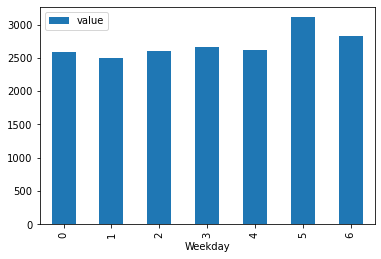

In [42]:
columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = weekday_avg_calories_df.plot.bar(x='Weekday', y='value')

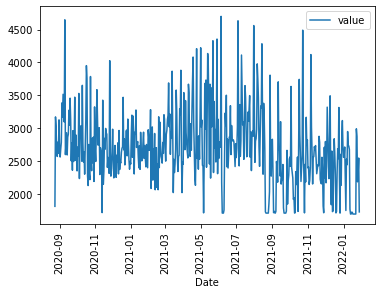

In [44]:
ax = weekday_calories_df.plot.line(x='Date', y='value', rot=90)